# Seaborn Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
sns.set_palette("colorblind")

![Iris Species Examples](iris.jpeg)

Use the iris database to answer the following quesitons:

- What does the distribution of petal lengths look like?
- Is there a correlation between petal length and petal width?
- Would it be reasonable to predict species based on sepal width and sepal length?
- Which features would be best used to predict species?

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


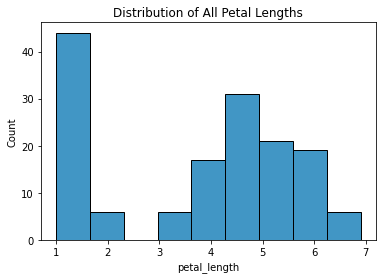

In [3]:
plt.title("Distribution of All Petal Lengths")
sns.histplot(x="petal_length", data=iris)
plt.show()

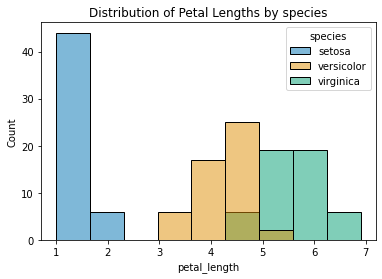

In [4]:
plt.title("Distribution of Petal Lengths by species")
sns.histplot(x="petal_length", hue="species", data=iris)
plt.show()

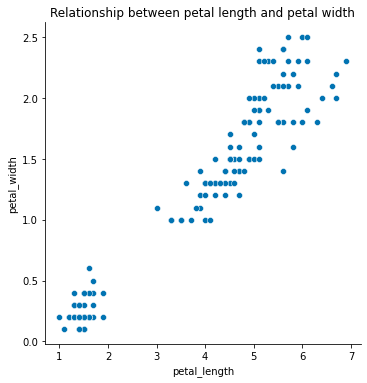

In [5]:
# Is there a correlation between petal length and petal width?
sns.relplot(x="petal_length", y="petal_width", data=iris)
plt.title("Relationship between petal length and petal width")
plt.show()

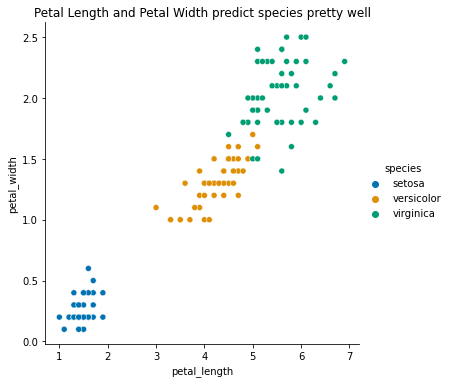

In [6]:
# Would it be reasonable to predict species based on sepal width and sepal length?
sns.relplot(x="petal_length", y="petal_width", data=iris, hue="species")
plt.title("Petal Length and Petal Width predict species pretty well")
plt.show()

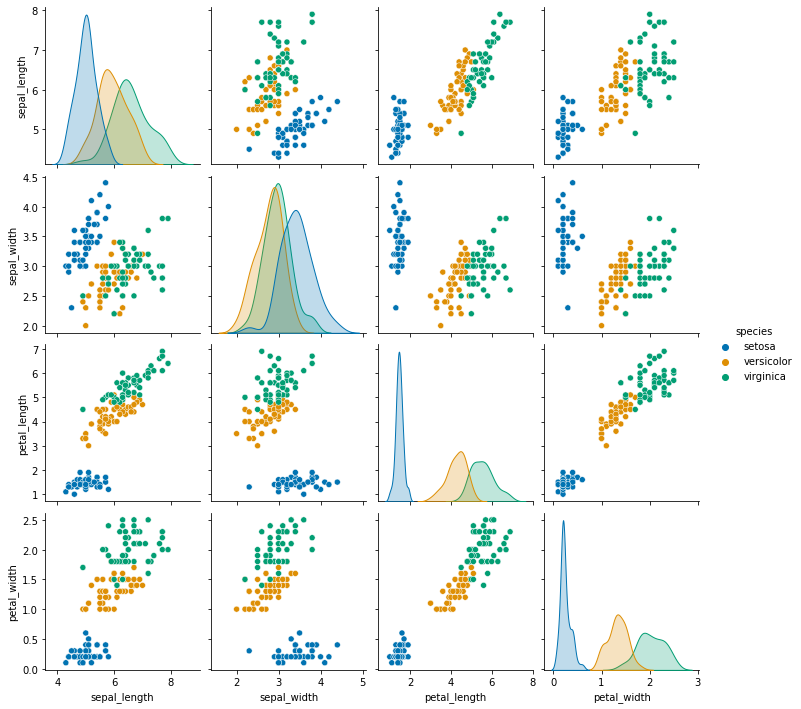

In [7]:
# Which features would be best used to predict species?
sns.pairplot(iris, hue="species")
plt.show()

Using the lesson as an example, use seaborn's `load_dataset` function to load the `anscombe` data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [8]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [9]:
anscombe.groupby("dataset").agg(["min", "median", "mean", "std", "max"])

x                                 y                             \
         min median mean       std   max   min median      mean       std   
dataset                                                                     
I        4.0    9.0  9.0  3.316625  14.0  4.26   7.58  7.500909  2.031568   
II       4.0    9.0  9.0  3.316625  14.0  3.10   8.14  7.500909  2.031657   
III      4.0    9.0  9.0  3.316625  14.0  5.39   7.11  7.500000  2.030424   
IV       8.0    8.0  9.0  3.316625  19.0  5.25   7.04  7.500909  2.030579   

                
           max  
dataset         
I        10.84  
II        9.26  
III      12.74  
IV       12.50

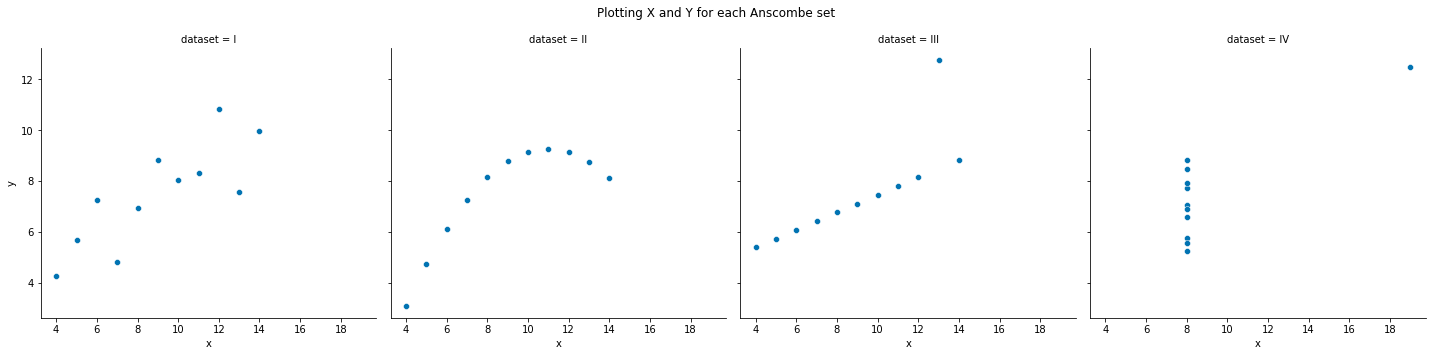

In [10]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.relplot(x="x", y="y", data=anscombe, col="dataset")
plt.suptitle("Plotting X and Y for each Anscombe set")
plt.tight_layout()
plt.show()

Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.


In [11]:
sprays = data("InsectSprays", show_doc=True)


InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [12]:
sprays = data("InsectSprays")
sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


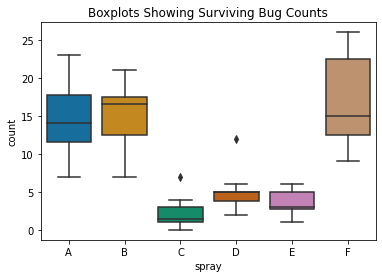

In [13]:
plt.title("Boxplots Showing Surviving Bug Counts")
sns.boxplot(data=sprays, x="spray", y="count")
plt.show()

Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
- Does whether or not a province is Catholic influence fertility?
- What measure correlates most strongly with fertility?

In [14]:
swiss = data("swiss")
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


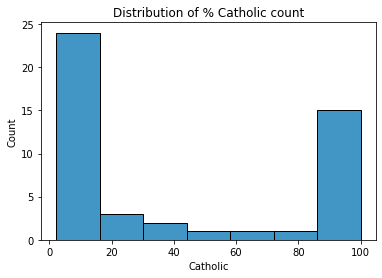

In [15]:
sns.histplot(swiss.Catholic)
plt.title("Distribution of % Catholic count")
plt.show()

In [16]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
swiss["is_catholic"] = swiss.Catholic > 50

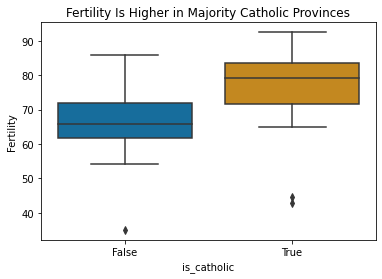

In [17]:
# Does whether or not a province is Catholic influence fertility?
sns.boxplot(data=swiss, x="is_catholic", y="Fertility")
plt.title("Fertility Is Higher in Majority Catholic Provinces")
plt.show()

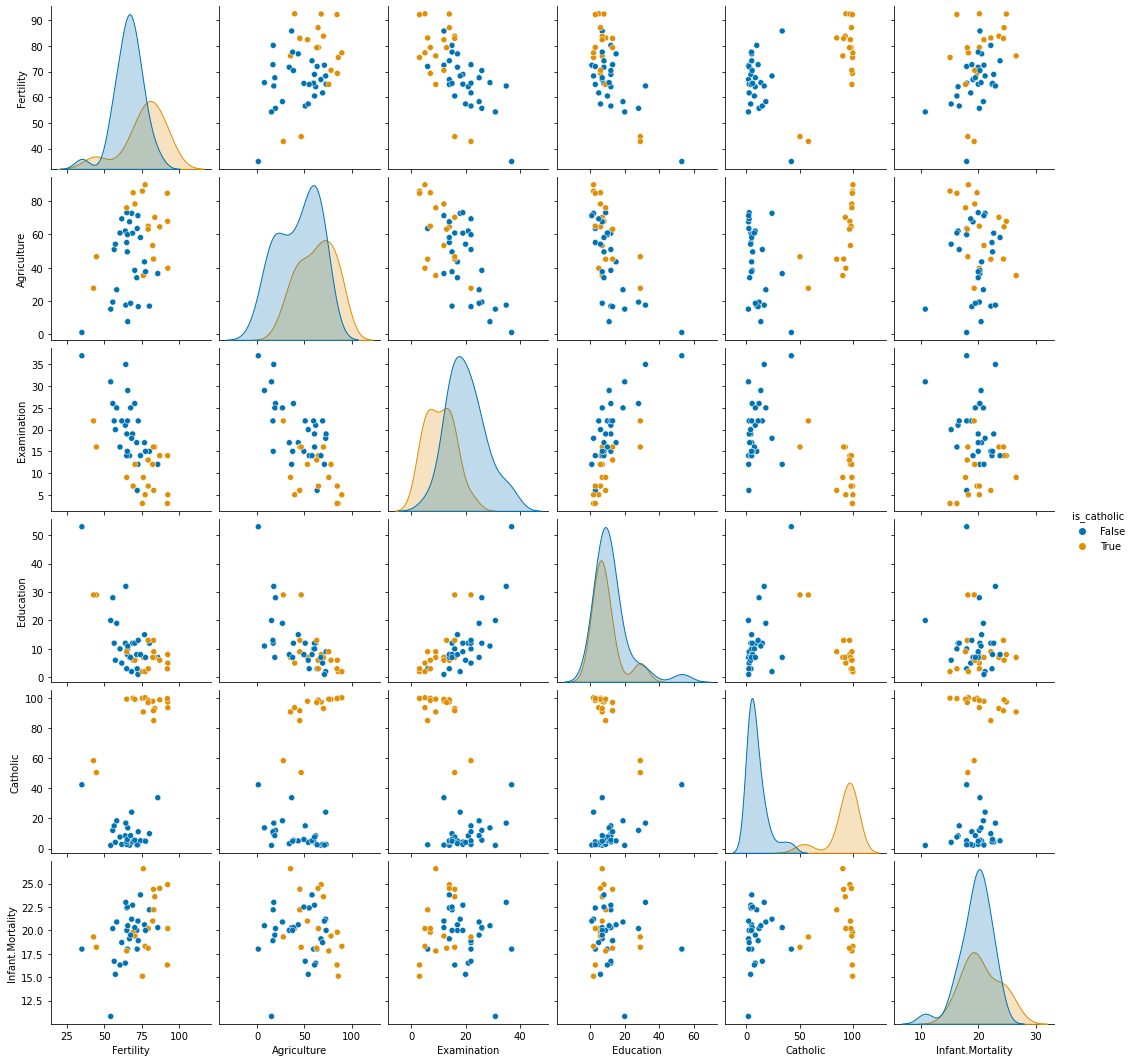

In [18]:
# What measure correlates most strongly with fertility?
sns.pairplot(swiss, hue="is_catholic")

In [19]:
# Our eyes can deceive us, so let's check the numbers!
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.


In [20]:
def get_db_url(db):
    from env import user, password, host
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [21]:
url = get_db_url('chipotle')
query = "SELECT * FROM orders"
orders = pd.read_sql(query, url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [22]:
# Data Cleaning
# Convert the item_price column into a float
orders['item_price'] = orders.item_price.str.replace('$', '', regex=False).astype('float')

In [23]:
# Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.
best_sellers = orders.groupby('item_name').quantity.sum().nlargest(4)
best_sellers

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [24]:
# revenue produced by 4 highest selling items.

revenue = orders[orders.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum()
revenue = revenue.sort_values(ascending = False).reset_index()
revenue

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


Text(0.5, 0.98, 'Revenue from Top 4 selling Items')

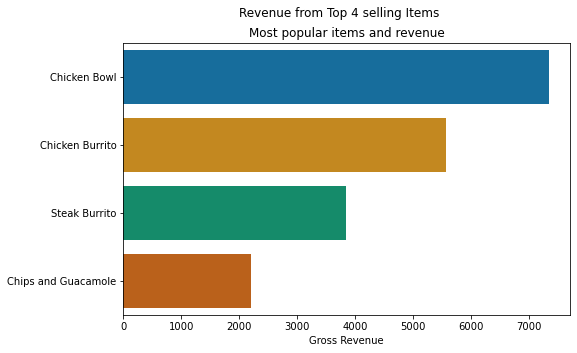

In [25]:
plt.figure(figsize = (8, 5))
sns.barplot(y = 'item_name', x = 'item_price', data = revenue)
plt.title('Most popular items and revenue')

plt.ylabel("") # to get remove the column_name
plt.xlabel("Gross Revenue")
plt.suptitle("Revenue from Top 4 selling Items")

Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.


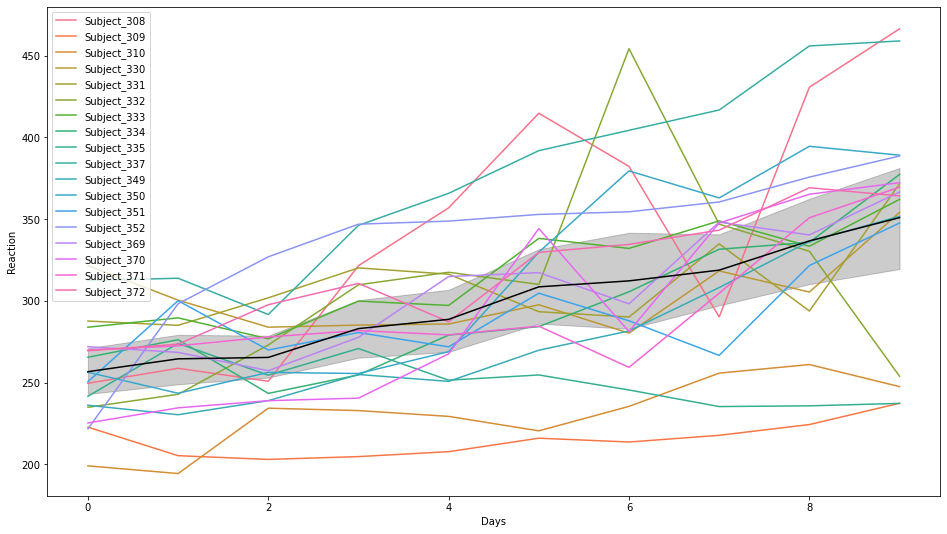

In [26]:
sleepstudy = data('sleepstudy')
sleepstudy['Subject'] = 'Subject_' + sleepstudy.Subject.astype(str)

plt.figure(figsize=(16, 9))

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', estimator = 'mean')
plt.show()